#### sklearn.linear_model.LinearRegression
class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

In [1]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.2, random_state = 0)

In [4]:
# 선형 회귀 모델로 학습 수행
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
model.coef_

array([ -35.55025079, -243.16508959,  562.76234744,  305.46348218,
       -662.70290089,  324.20738537,   24.74879489,  170.3249615 ,
        731.63743545,   43.0309307 ])

In [5]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

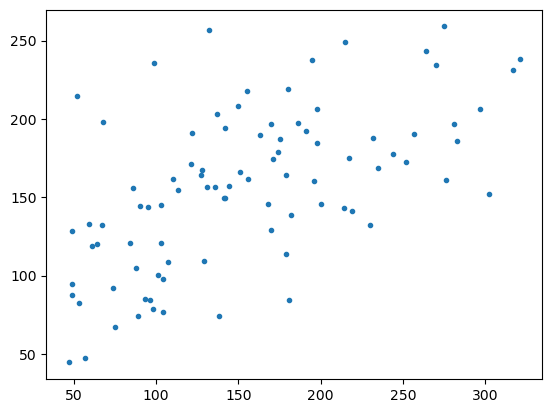

In [6]:
# 실제 데이터와 예측 데이터 비교
plt.plot(y_test, y_pred, '.')

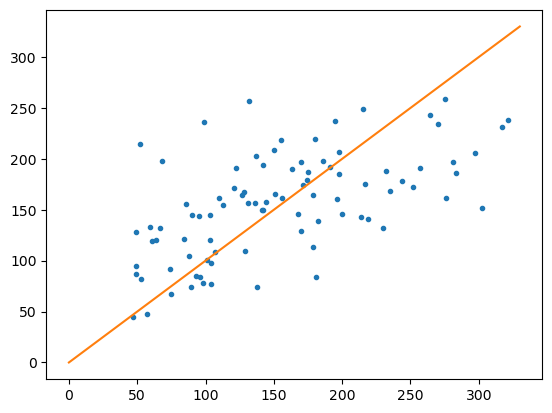

In [8]:
# 직선을 그리기 위하여 완벽한 선형 데이터를 생성
x = np.linspace(0, 330, 100)
y = x
plt.plot(y_test, y_pred, '.')
plt.plot(x, y)
plt.show()

==================================================================================================
보스턴 주객가격 예측

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

boston = pd.read_csv('datasets/housing.csv', header = None, names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],sep = '\s+')

In [27]:
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


<Axes: >

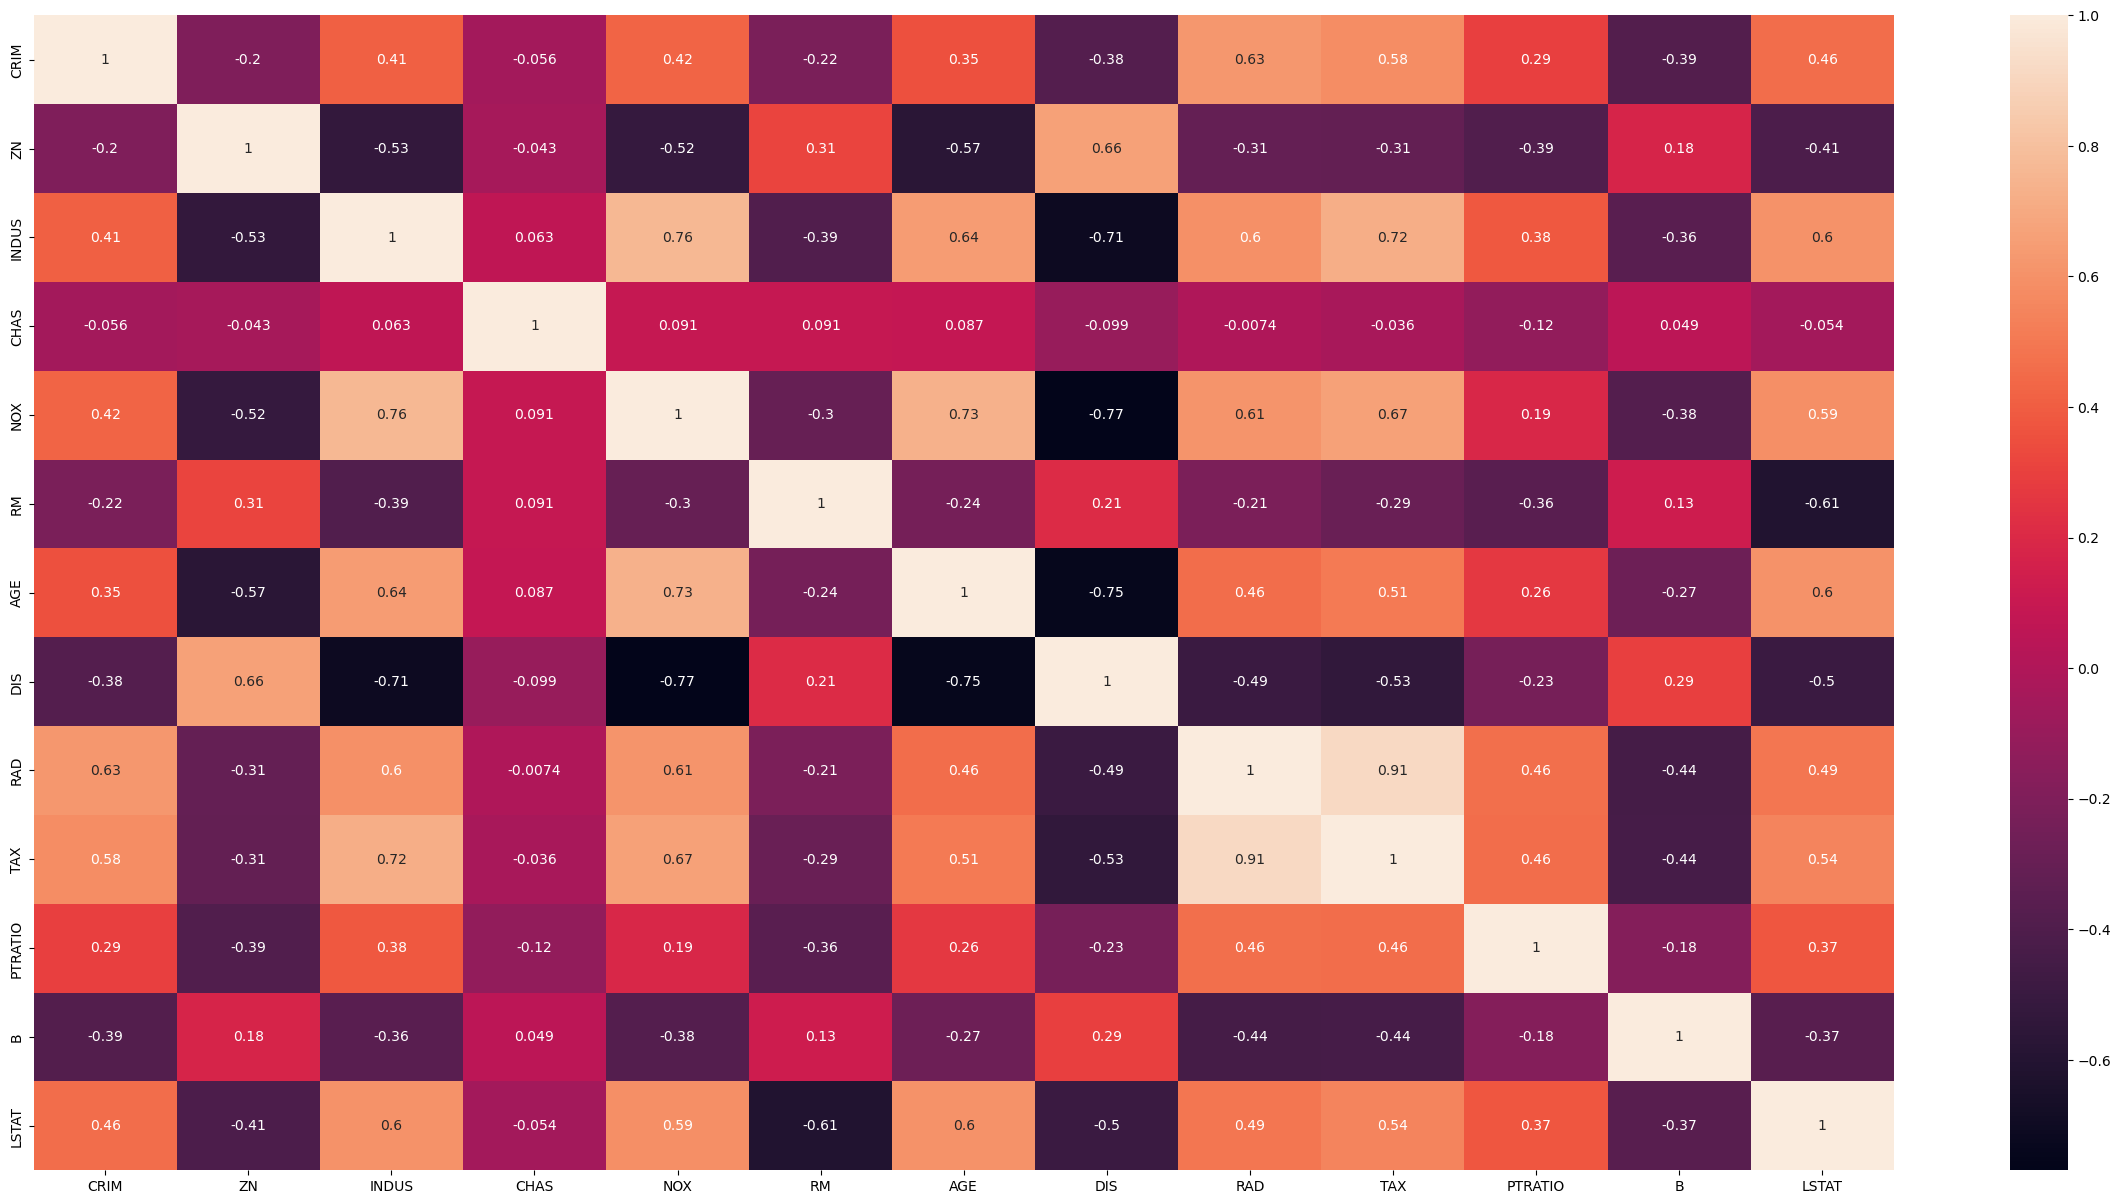

In [28]:
# 상관관계 HeatMap
features = boston.drop(columns = 'MEDV')
label = boston['MEDV']
corr = features.corr()

plt.figure(figsize = (30, 15))
sns.heatmap(corr, annot = True)

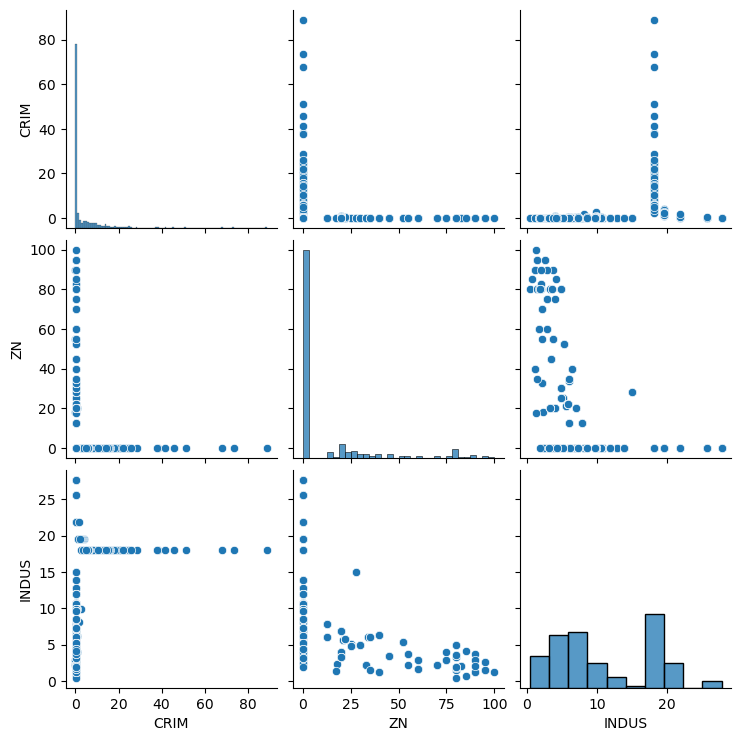

In [33]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(boston[['CRIM', 'ZN', 'INDUS']]);

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', boston, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,585.265238,Intercept
1,1.792192,CRIM
2,2.298758,ZN
3,3.991596,INDUS
4,1.073995,CHAS
5,4.393720,NOX
6,1.933744,RM
7,3.100826,AGE
8,3.955945,DIS
9,7.484496,RAD


In [35]:
df = boston.drop(columns = ['RAD', 'TAX'])
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO',
       'B', 'LSTAT', 'MEDV'],
      dtype='object')

<Axes: >

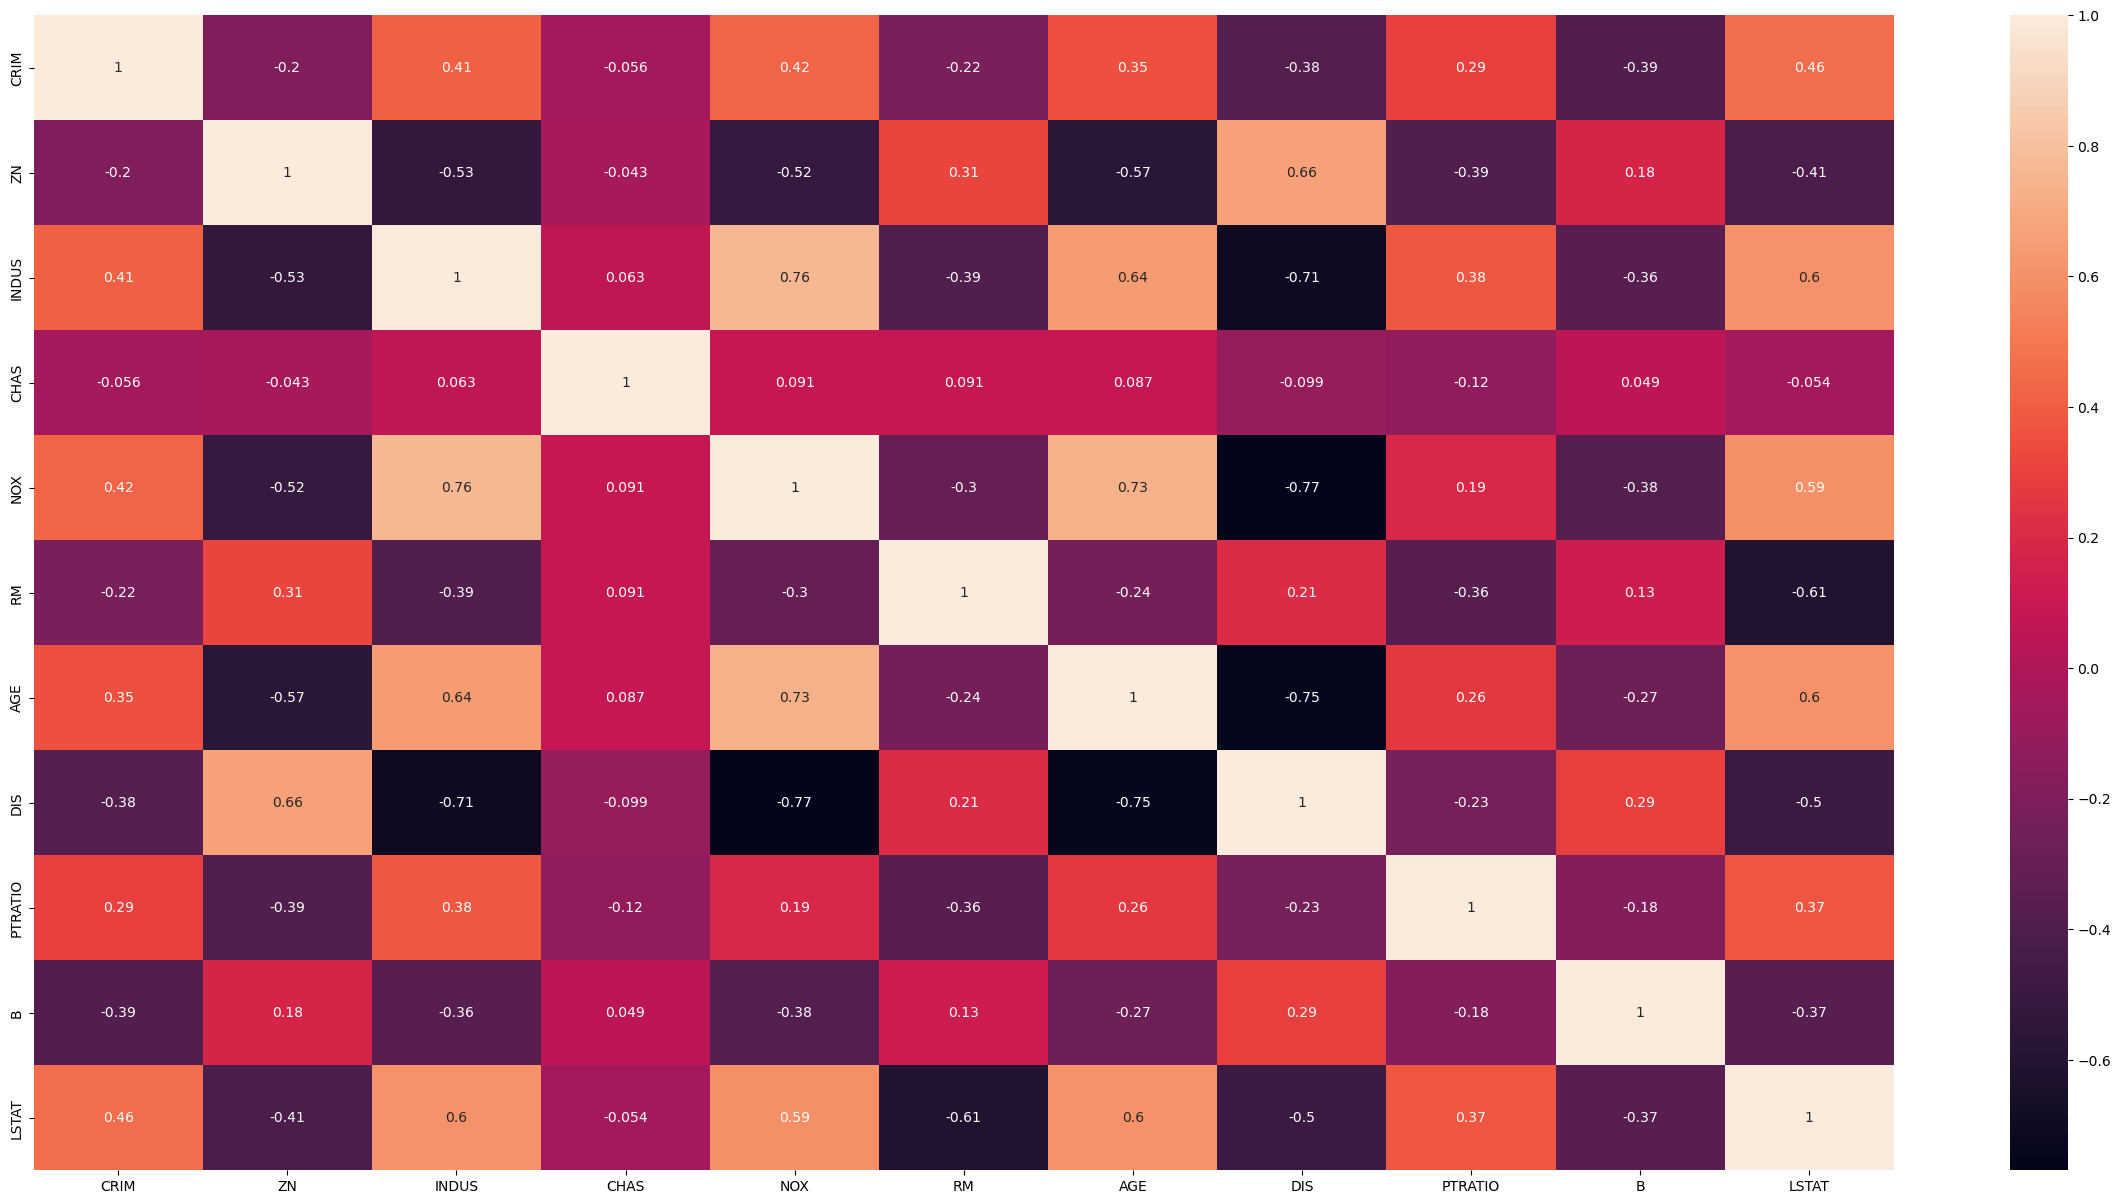

In [36]:
features = df.drop(columns = 'MEDV')
label = df['MEDV']
corr = features.corr()

plt.figure(figsize = (30, 15))
sns.heatmap(corr, annot = True)

In [37]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,22.000000,396.900000,37.970000


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
# lr.fit(scaled_X_train, y_train)
cross_val_score(lr, X = scaled_X_train, y = y_train, cv = 3, scoring = 'neg_mean_squared_error')

array([-25.60304518, -24.75144126, -21.49544997])